# Overview
Plot the percentage fused against the max fusion length for each file

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os

In [9]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

defaulting to most recent experiment: 2025_02_12_11:50:58.124492


In [10]:
csv_path = f"{full_path}/cycles.csv"
img_path = f"{full_path}/cycles.png"

In [11]:
df = pd.read_csv(csv_path)

In [12]:
grouped = df.groupby(['file', 'rule_title'], dropna=False, sort=False)

In [13]:
len(grouped)

10

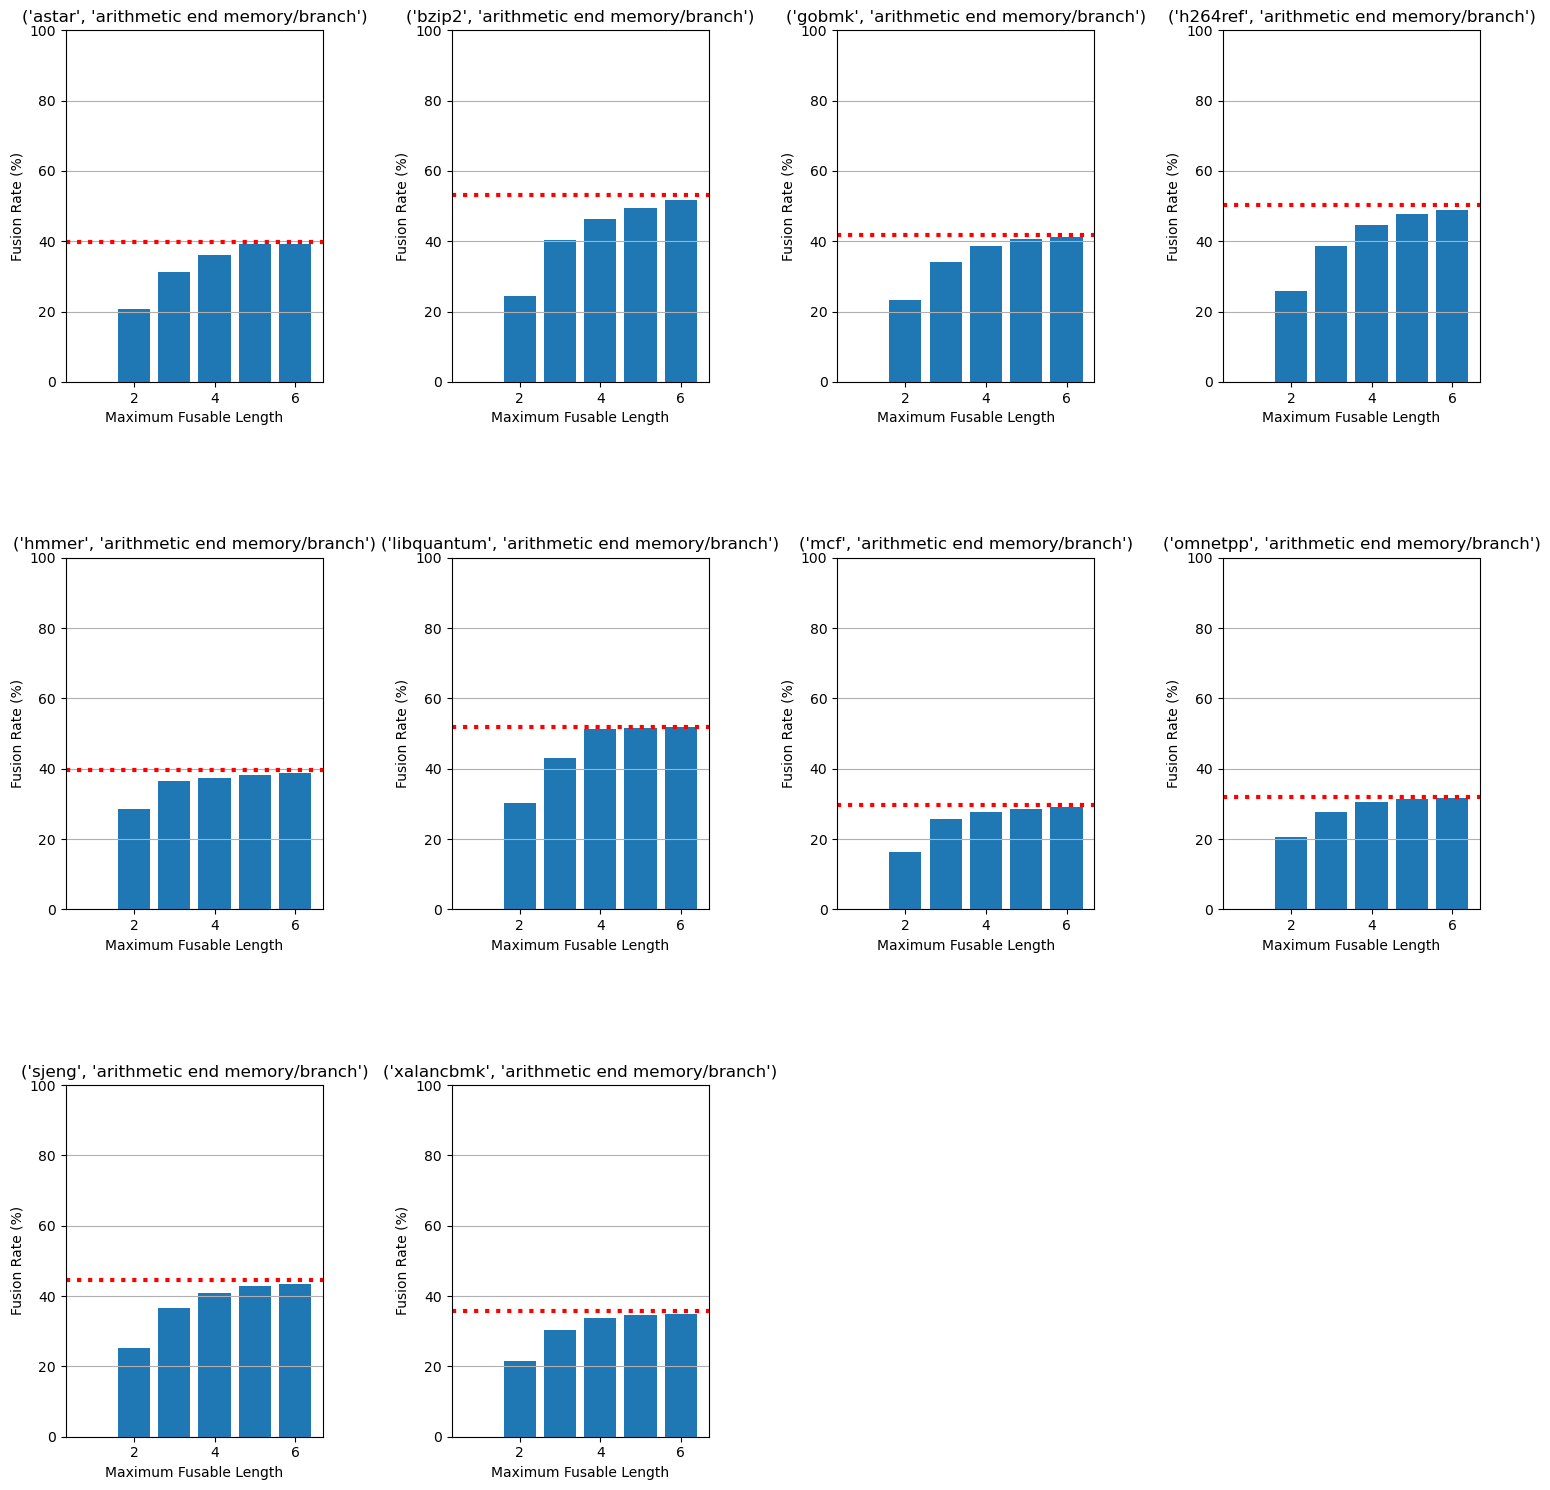

In [14]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value = data['cycle_percentage'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['user_defined_key'][1:11], data['cycle_percentage'][1:11])
    axes[i].set_title(f'{group_name}')
    axes[i].set_xlabel('Maximum Fusable Length')
    axes[i].set_ylabel('Fusion Rate (%)')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()